In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
orderproducts = pd.read_csv('../data/orderproducts.csv', parse_dates=[1,11], infer_datetime_format=True)

In [4]:
products = pd.read_csv('../data/products.csv')

In [5]:
orderproducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   order_id            7560 non-null   int64              
 1   order_created_at    7560 non-null   datetime64[ns, UTC]
 2   order_total_price   3791 non-null   float64            
 3   order_status        7189 non-null   object             
 4   order_discounts     7560 non-null   object             
 5   product_title       7560 non-null   object             
 6   product_sku         7551 non-null   object             
 7   product_quantity    7560 non-null   int64              
 8   product_discount    7560 non-null   float64            
 9   product_category    7152 non-null   object             
 10  product_deparments  0 non-null      float64            
 11  product_created_at  7152 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64

In [6]:
orderproducts.head()

,order_id,order_created_at,order_total_price,order_status,order_discounts,product_title,product_sku,product_quantity,product_discount,product_category,product_deparments,product_created_at
0,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,0.00,Electric Guitar Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00
1,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,The Tick™ 2.0 Black,M80-TICK-V2-BLK,1,0.00,Pedals & Pedalboards Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00
2,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,Pedalboard Lite (Silver),PFX-PB-LT-SLV,1,0.00,Pedalboards,NaN,2017-10-26 02:57:14+00:00
3,20556,2018-01-02 10:56:19+00:00,249.99,fulfilled,yes,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,0.00,Electric Guitar Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00
4,20554,2018-01-02 11:45:26+00:00,NaN,fulfilled,no,The FlyBy,EFX-FLY-BLK,1,229.99,DJ Equipment Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00


In [7]:
products.head()

,id,sku,price_usd,category,tags,created_at
0,33184,M80-AD-BLK,229.99,Acoustic Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
1,33186,M80-VEG-BLK,249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
2,33187,M80-EG-BLK,229.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
3,34589,M80-VEG-GRY,249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
4,34590,M80-VEB-BLK,249.99,Bass Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z


In [8]:
orderproducts['order_date'] = [x.date() for x in orderproducts['order_created_at']]  # remove time, display only date

In [9]:
# Extract the product price for individual item in the list
arr, emp = [], []
for i, row  in orderproducts.iterrows():
    if row.product_sku in list(products.sku):
        arr.append(float(products.loc[products['sku'] == row.product_sku, 'price_usd']))
    else:
        emp.append(row.product_sku)
        arr.append(0)
orderproducts['product_price'] = pd.DataFrame(arr)

In [10]:
print(len(emp))

408


#### There are 408 items whose products are not in the product category list

In [11]:
print(sorted(list(set(emp))[1:]))

['50-K61-FOAM', 'B-M80-AC-BLK', 'B-M80-EB-BLK', 'B-M80-SAD-BLK', 'B-M80-VEG-GRY', 'CPN-BAG-STRAP-DPS-BLK', 'M80-TT-BLK', 'PFX-PB-L-BLK', 'PFX-PB-L-SLV', 'PFX-PB-M-BLK', 'PFX-PB-M-SLV', 'PFX-PB-S-BLK', 'PFX-PB-S-SLV', 'SRB-L-BLK', 'SRB-S-BLK', 'STICKER', 'TEAR-AID', 'TEX-BLK', 'WCS-L-BLK', 'WCS-M-BLK', 'ZP1-L-BLK']


#### List comprehension cannot resolve to save in float
orderproducts['product_price'] = [products.loc[products['sku'] == x, 'price_usd'] for x in orderproducts['product_sku']]

In [12]:
df = orderproducts[['order_created_at', 'product_price', 'product_quantity','product_sku', 'product_category']]

In [13]:
df.set_index('order_created_at', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2018-01-01 17:24:47+00:00 to 2021-03-08 11:25:23+00:00
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_price     7560 non-null   float64
 1   product_quantity  7560 non-null   int64  
 2   product_sku       7551 non-null   object 
 3   product_category  7152 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 295.3+ KB


In [15]:
pd.crosstab(df.index, df['product_sku']).resample('Y').sum()

product_sku,50-K61-FOAM,B-M80-AC-BLK,B-M80-EB-BLK,B-M80-SAD-BLK,B-M80-VEG-GRY,CPN-BAG-STRAP-DPS-BLK,CVL-DCW-ASH,CVL-DCW-BLK,CVL-LLT-13-ASH,CVL-LLT-13-BLK,...,PFX-SMS-BLK,PFX-SMS-SLV,SRB-L-BLK,SRB-S-BLK,STICKER,TEAR-AID,TEX-BLK,WCS-L-BLK,WCS-M-BLK,ZP1-L-BLK
row_0,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-31 00:00:00+00:00,1,1,2,1,1,3,11,39,6,11,...,0,0,4,9,2,31,1,2,9,1
2019-12-31 00:00:00+00:00,0,0,0,0,0,0,0,54,1,3,...,0,0,0,0,0,30,0,1,25,0
2020-12-31 00:00:00+00:00,0,0,0,0,0,0,0,42,6,6,...,13,3,0,0,0,9,0,2,0,0
2021-12-31 00:00:00+00:00,0,0,0,0,0,0,0,2,0,2,...,1,0,0,0,0,3,0,0,0,0


In [16]:
pd.crosstab(df.index, df['product_sku']).resample('M').sum()

product_sku,50-K61-FOAM,B-M80-AC-BLK,B-M80-EB-BLK,B-M80-SAD-BLK,B-M80-VEG-GRY,CPN-BAG-STRAP-DPS-BLK,CVL-DCW-ASH,CVL-DCW-BLK,CVL-LLT-13-ASH,CVL-LLT-13-BLK,...,PFX-SMS-BLK,PFX-SMS-SLV,SRB-L-BLK,SRB-S-BLK,STICKER,TEAR-AID,TEX-BLK,WCS-L-BLK,WCS-M-BLK,ZP1-L-BLK
row_0,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-31 00:00:00+00:00,0,0,0,0,0,0,0,4,0,4,...,0,0,1,1,1,3,1,0,0,0
2018-02-28 00:00:00+00:00,0,0,1,0,0,1,0,4,0,1,...,0,0,0,1,0,6,0,0,3,0
2018-03-31 00:00:00+00:00,0,0,0,0,0,0,0,1,0,2,...,0,0,1,0,1,3,0,0,0,0
2018-04-30 00:00:00+00:00,0,0,1,1,0,0,3,8,0,0,...,0,0,2,0,0,3,0,0,0,0
2018-05-31 00:00:00+00:00,0,0,0,0,1,1,1,2,1,1,...,0,0,0,1,0,2,0,0,0,0
2018-06-30 00:00:00+00:00,0,0,0,0,0,0,1,4,0,1,...,0,0,0,1,0,2,0,0,0,1
2018-07-31 00:00:00+00:00,0,1,0,0,0,1,0,1,1,0,...,0,0,0,2,0,3,0,0,2,0
2018-08-31 00:00:00+00:00,0,0,0,0,0,0,2,2,0,1,...,0,0,0,1,0,2,0,1,0,0


In [17]:
prod_yearly = pd.crosstab(df.index, df['product_sku']).resample('Y').sum()

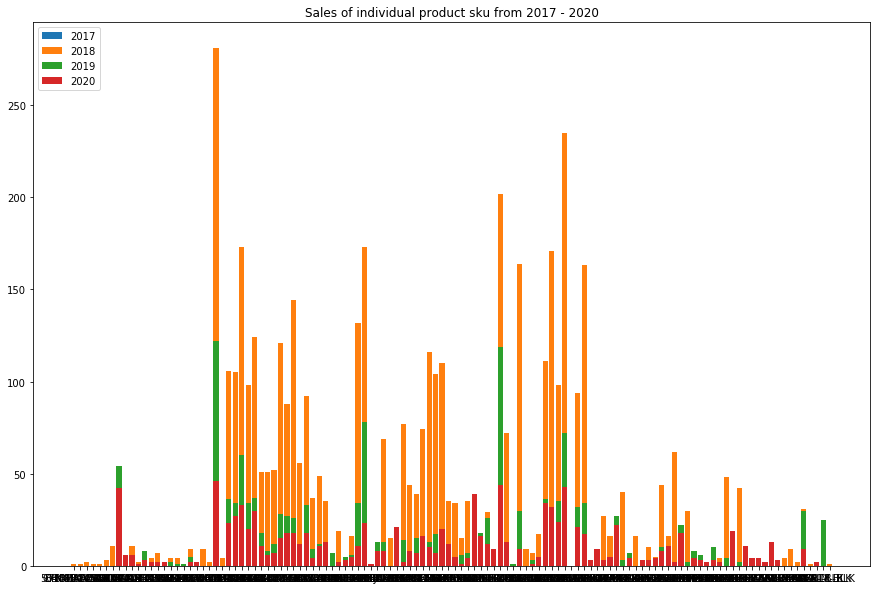

In [18]:
plt.figure(figsize=(15,10))
plt.bar(prod_yearly.columns, prod_yearly.iloc[0,:].values)
plt.bar(prod_yearly.columns, prod_yearly.iloc[1,:].values)
plt.bar(prod_yearly.columns, prod_yearly.iloc[2,:].values)
plt.bar(prod_yearly.columns, prod_yearly.iloc[3,:].values)
plt.legend(["2017", "2018", "2019", "2020"], loc="upper left")
plt.title('Sales of individual product sku from 2017 - 2020')
plt.show()